In [1]:
import numpy as np #Importing numpy 
from pymoo.algorithms.moo.nsga2 import NSGA2 #Importing NSGA 2 
from pymoo.core.problem import ElementwiseProblem #Importing problem
from pymoo.optimize import minimize #Importing objective
from pymoo.visualization.scatter import Scatter #Importing plots
import pandas as pd
import matplotlib.pyplot as plt #importing matplotlib plot
from pymoo.core.problem import Problem #Importing problem
from pymoo.problems.functional import FunctionalProblem #Importing problem

In [2]:
class MyProblem(ElementwiseProblem):

    def __init__(self, vmin=42, vmax=201, fmin=0.05, fmax=0.33, dmin=0.5, dmax=2.5):
        super().__init__(n_var=3,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([vmin, fmin, dmin]),
                         xu=np.array([vmax, fmax, dmax]))
        self.i = 1

    def f1(self, v, f, d): #objective 1
        return 0.33349*(v**0.1480)*(f**0.4912)*(d**0.2898)

    def f2(self, v, f, d): #objective 2
        return -1000*v*f*d

    def g1(self, v, f,d): #constraint 1
        return (88 * (v**0.3156) * (f**0.2856)* (d**0.2250))-500

    def g2(self, v, f, d): #constraint 2
        return (18 * (v**(-0.0757)) * (f**0.7593) * (d**0.1912))-2

    def _evaluate(self, x, out, *args, **kwargs):
        v = x[0]
        f = x[1]
        d = x[2]
        f1 = self.f1(v, f, d)
        f2 = self.f2(v, f, d)
        g1 = self.g1(v, f, d)
        g2 = self.g2(v, f, d)
        self.i += 1
        out["F"] = [f1, f2]
        out["G"] = [g1, g2]
        
problem = MyProblem()


      TW       MRR       V     F     D
0   0.27  37099.45  200.99  0.07  2.50
1   0.11   1101.28   43.84  0.05  0.50
2   0.25  33245.64  200.59  0.07  2.47
3   0.26  34519.17  197.79  0.07  2.47
4   0.12   1660.39   59.77  0.05  0.56
..   ...       ...     ...   ...   ...
95  0.11   1179.87   42.34  0.05  0.56
96  0.19  15520.11  197.00  0.05  1.57
97  0.22  25175.02  199.18  0.05  2.46
98  0.18  11742.78  200.83  0.06  1.05
99  0.26  36892.91  200.83  0.07  2.50

[100 rows x 5 columns]


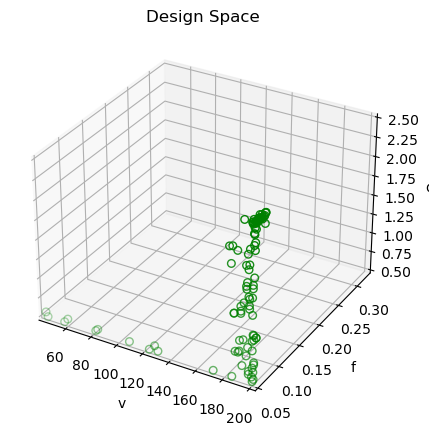

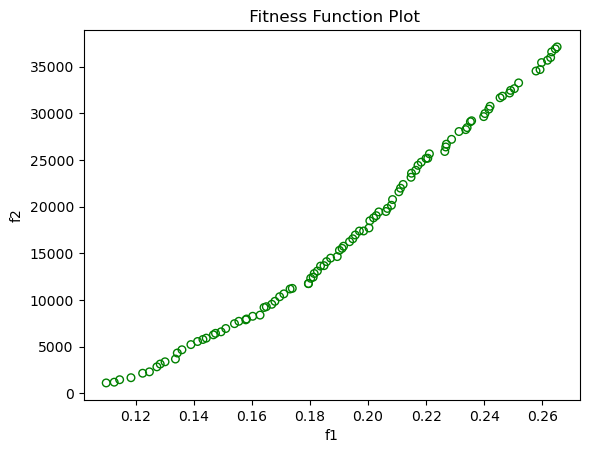

In [18]:
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

pop_size=100
algorithm = NSGA2(pop_size,n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True)

res = minimize(problem, algorithm, ("n_gen", 100), verbose=False, seed=1,save_history=True)
optimal_ip = pd.DataFrame(list(res.X))
optimal_op = pd.DataFrame(list(res.F))
result = pd.concat([optimal_op, optimal_ip], axis=1)
result.columns = ['TW', 'MRR', 'V', 'F','D']
result['MRR']=result['MRR']*-1
print(round(result.head(100),2))

from mpl_toolkits.mplot3d import Axes3D

xl, xu = problem.bounds()
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(res.X[:, 0], res.X[:, 1], res.X[:, 2], s=30, color='red',facecolors='none',edgecolors='green')
ax.set_xlim(xl[0], xu[0])
ax.set_ylim(xl[1], xu[1])
ax.set_zlim(xl[2], xu[2])
ax.set_title("Design Space")
ax.set_xlabel("v")
ax.set_ylabel("f")
ax.set_zlabel("d")
plt.show()

plt.title(" Fitness Function Plot")
plt.scatter(result.iloc[:, [0]], result.iloc[:, [1]],s = 30,color='red',facecolors='none',edgecolors='green')
plt.xlabel("f1")
plt.ylabel("f2");

